In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [18]:
# Import the log file
df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190622_201853/190622_201853_Detection_paramSearch_multi.csv")
df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190622_201853/190622_201853_Detection_paramSearch.csv")
#df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190622_202211/190622_202211_Detection_paramSearch.csv")
#df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190624_200747/190624_200747_Detection_paramSearch.csv")
#df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190622_234007/190622_234007_Detection_paramSearch.csv")

# Add the f1_score
df["f1_score"] = 1/(1/df["percentHeliTotalFiltered"]+1/df["percentFrameWithHeli"])

# Display
df.tail()

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold,diffMethod,dilationIterations,skipFrame,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
31,5,25,2,3,5,35,0,4,0,69.826543,1.967922,1.920502,0.564854,0.294118,0.563282,0.193225
32,5,25,2,3,5,45,0,4,0,70.030439,2.281729,2.269177,0.112971,0.049785,0.112656,0.034527
33,5,25,3,3,5,25,0,4,0,59.121040,1.722067,1.673184,0.649441,0.388147,0.643950,0.242174
34,5,25,3,3,5,35,0,4,0,58.437497,2.053073,2.037709,0.370112,0.181631,0.368567,0.121671
35,5,25,3,3,5,45,0,4,0,58.683659,1.948324,1.948324,0.018156,0.009319,0.018081,0.006149


[0, 1, 0, 1]

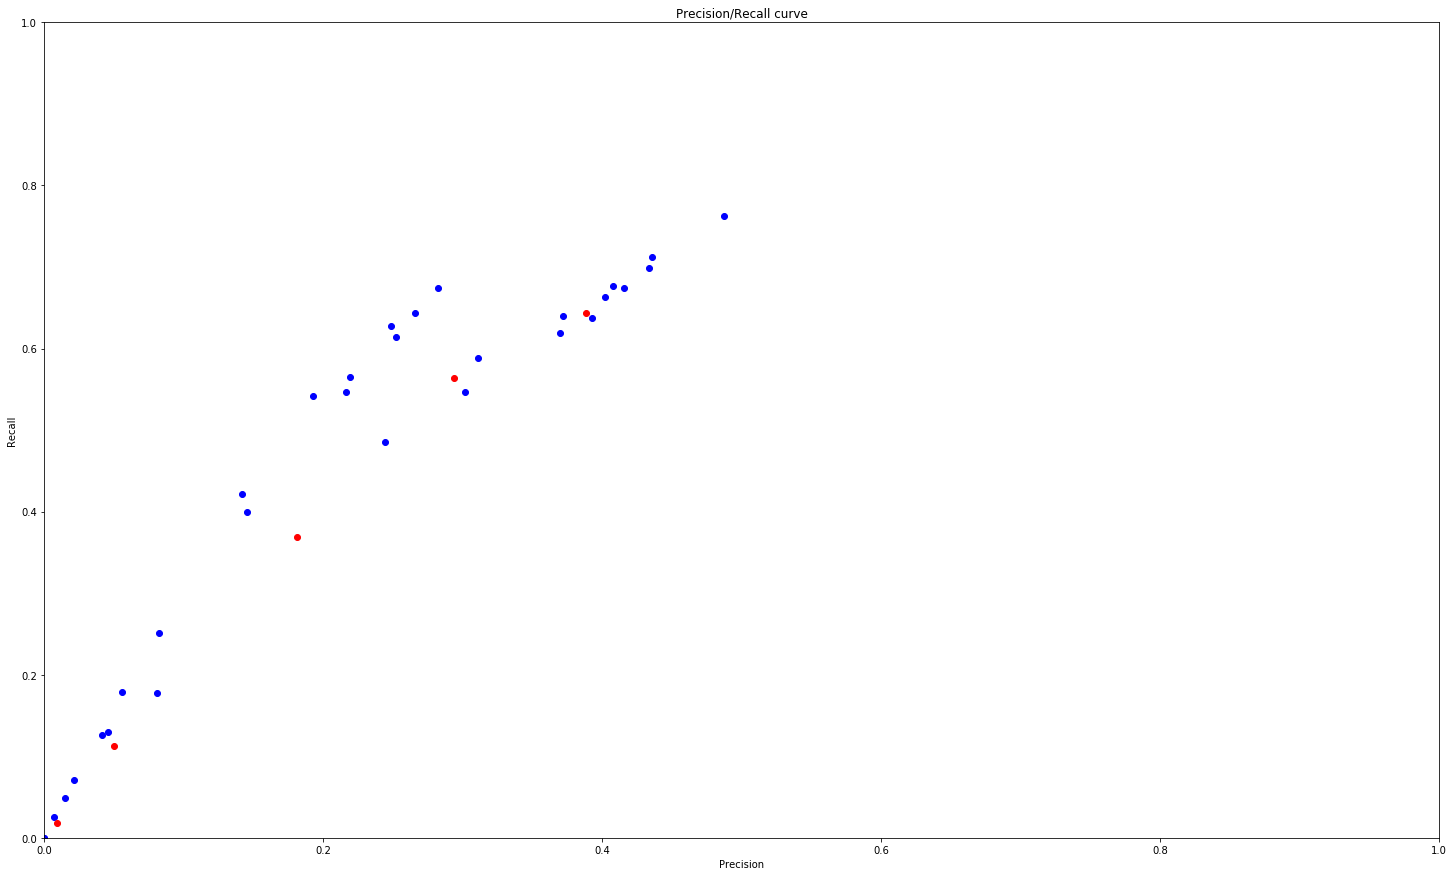

In [19]:
nSim = len(df)-5 # Show where the last 10 values have been found
plt.figure(figsize=(25, 15))
plt.scatter(df["percentHeliTotalFiltered"][:nSim], df["percentFrameWithHeli"][:nSim], c='blue')
plt.scatter(df["percentHeliTotalFiltered"][nSim:], df["percentFrameWithHeli"][nSim:], c='red')
plt.title("Precision/Recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.axis([0, 1, 0, 1])

In [20]:
def plotParam(param, paramRange):
    plt.figure(figsize=(25, 15))
    cmap = matplotlib.cm.get_cmap("jet")
    for index, value in enumerate(paramRange):
        #plt.figure(figsize=(25, 15))
        indexes = (df[param] == value)
        prec = df["percentHeliTotalFiltered"][indexes]
        recall = df["percentFrameWithHeli"][indexes]
        #print(min(paramRange), max(paramRange))
        if len(paramRange)>1:
            cmapValue = index/(len(paramRange)-1)
        else:
            cmapValue=0
        #print(cmapValue)
        plt.scatter(prec, recall, c=cmap(cmapValue))
        
        xcText, ycText = np.mean(prec), np.mean(recall)
        plt.text(xcText, ycText, str(value), color=cmap(cmapValue), fontdict={"weight": "bold", "size": 30})
        plt.title(param+" impact", fontdict={"weight": "bold", "size": 30})
        plt.xlabel("Precision", fontdict={"weight": "bold", "size": 20})
        plt.ylabel("Recall", fontdict={"weight": "bold", "size": 20})
        plt.axis([0, 1, 0, 1])

param = ["residualConnections"]
paramRange = [range(1, 11)]
for i in range(len(param)):
    plotParam(param[i], paramRange[i])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

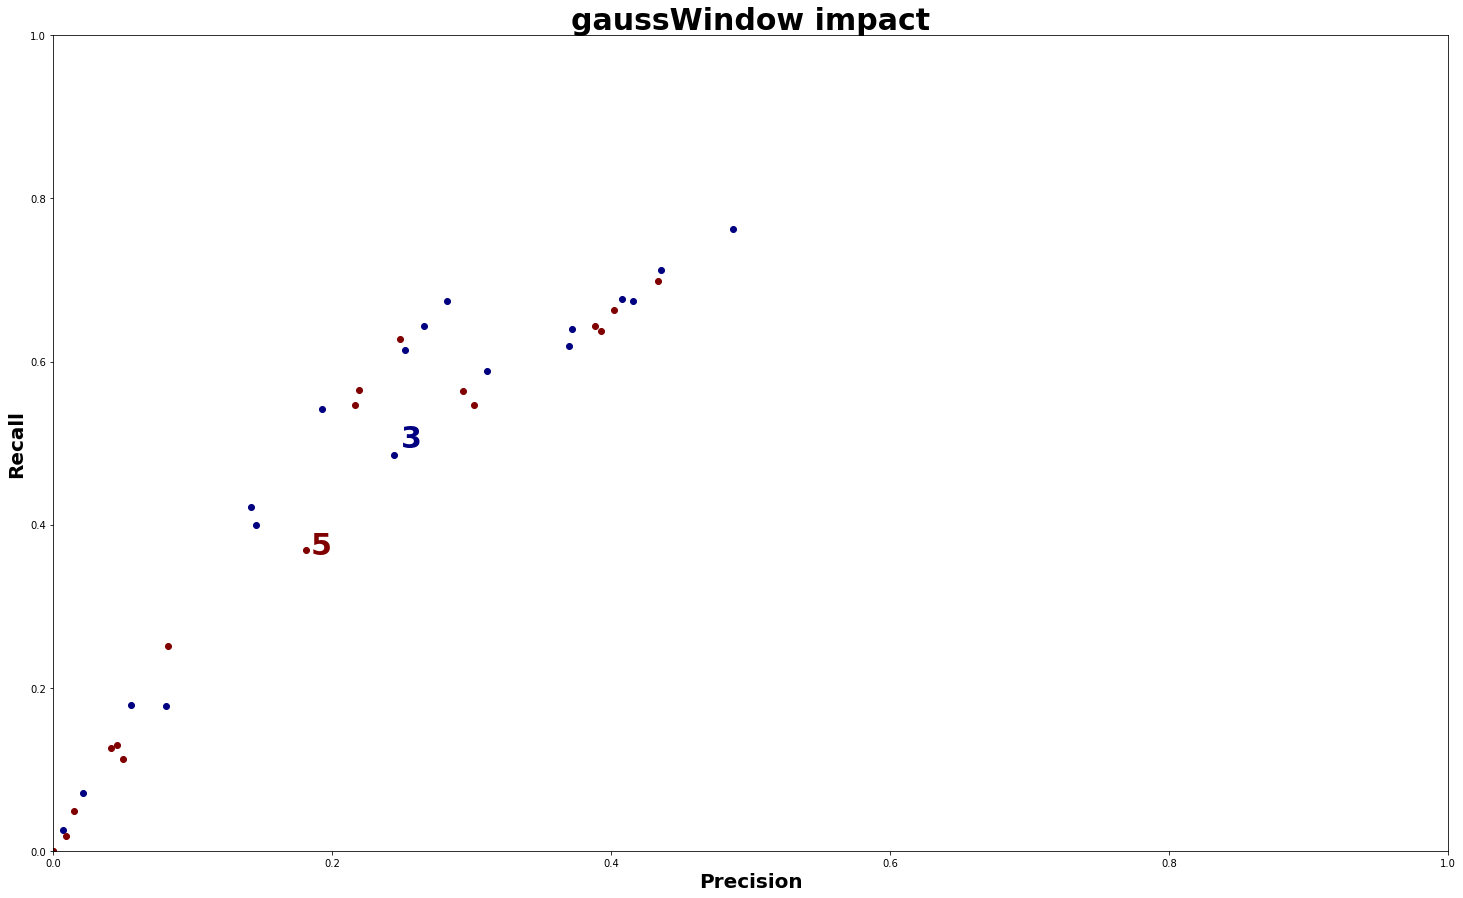

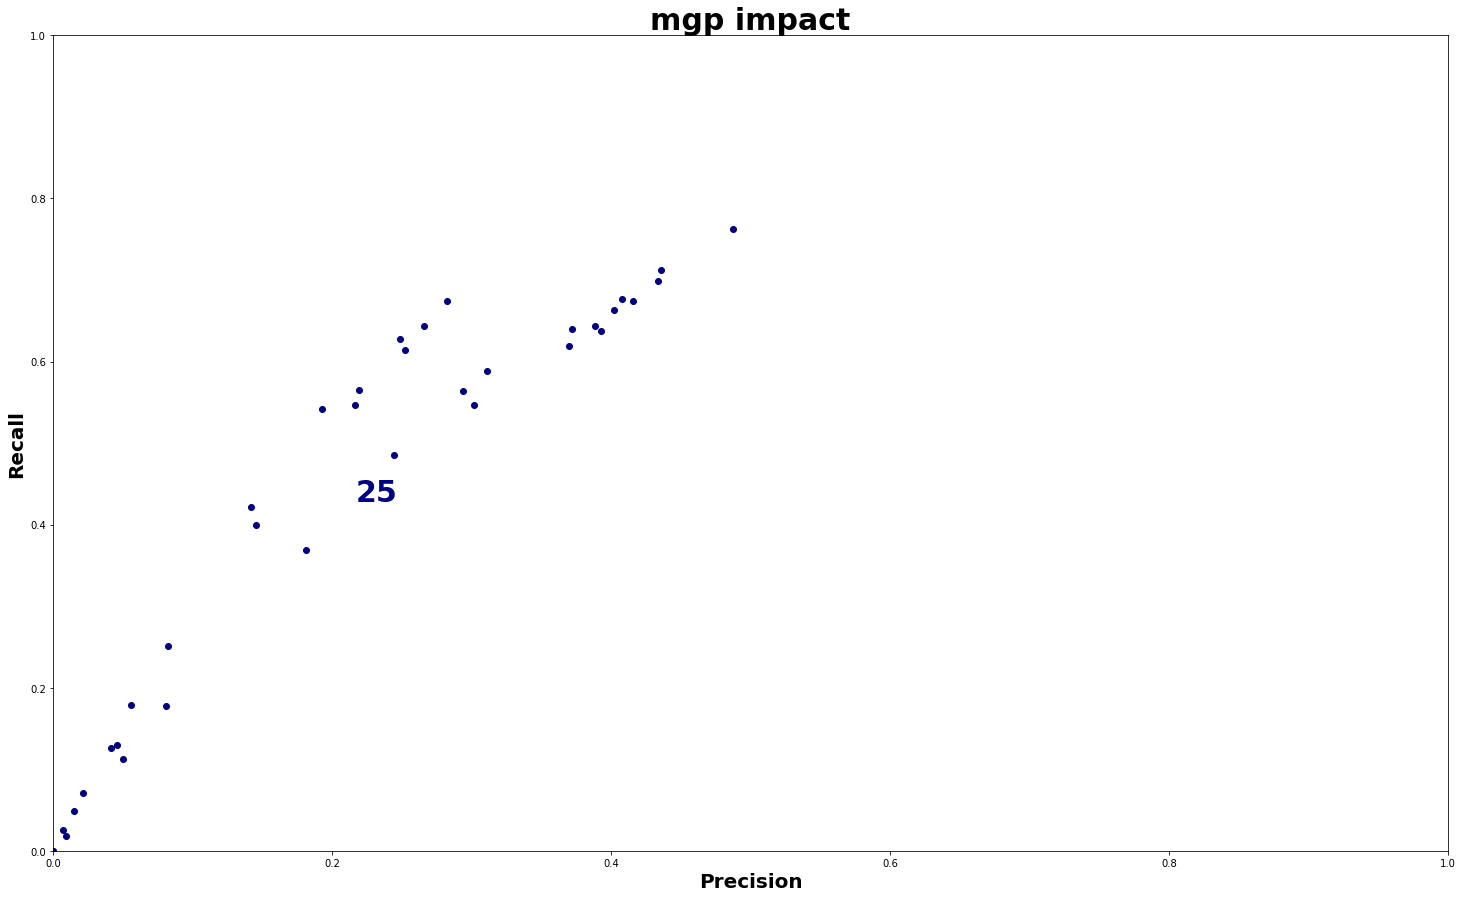

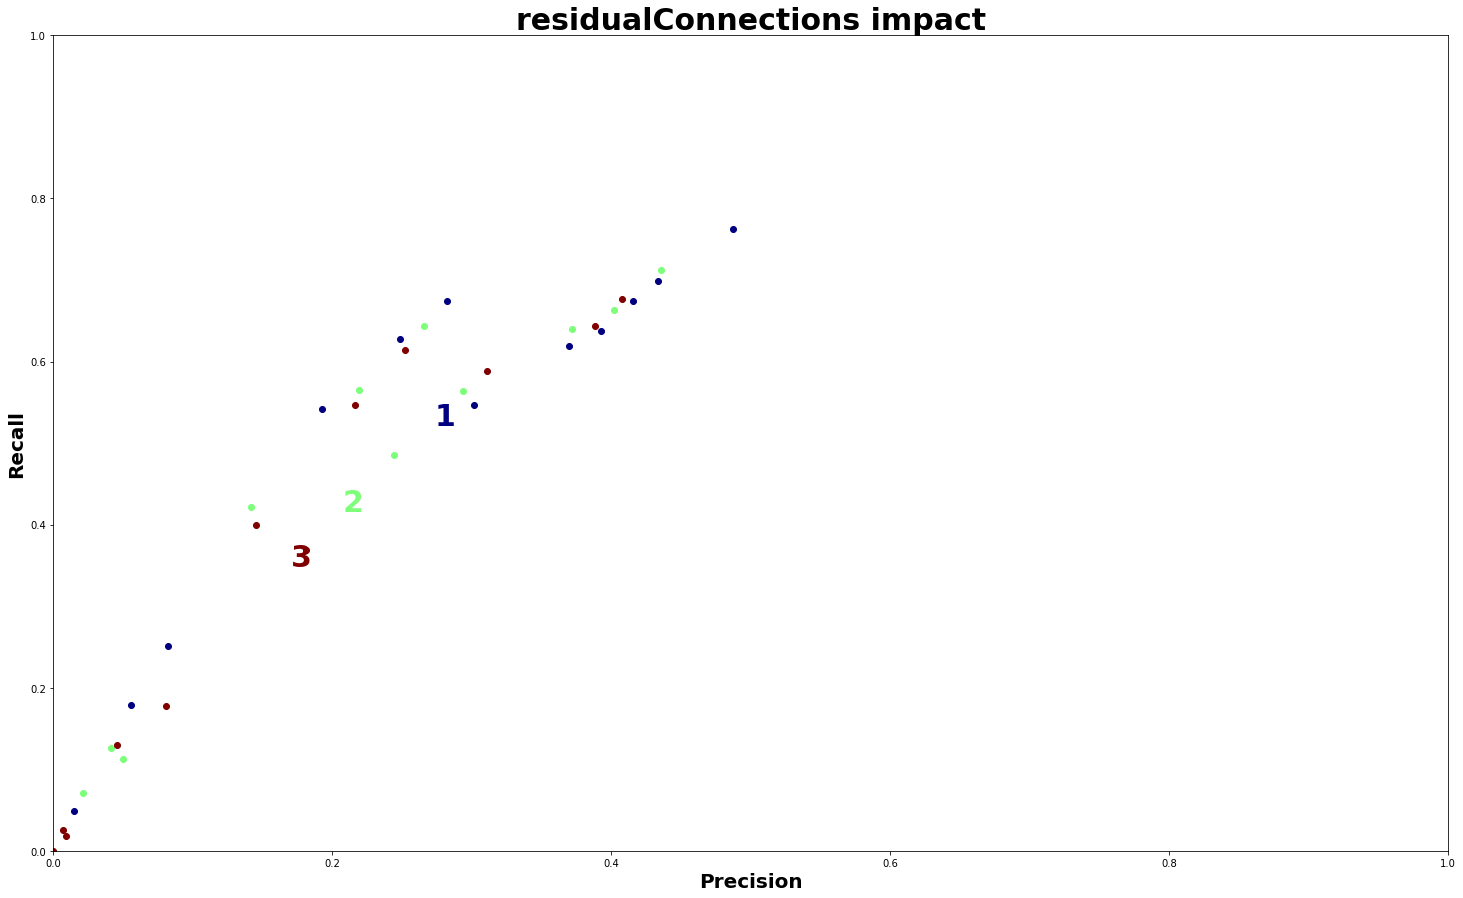

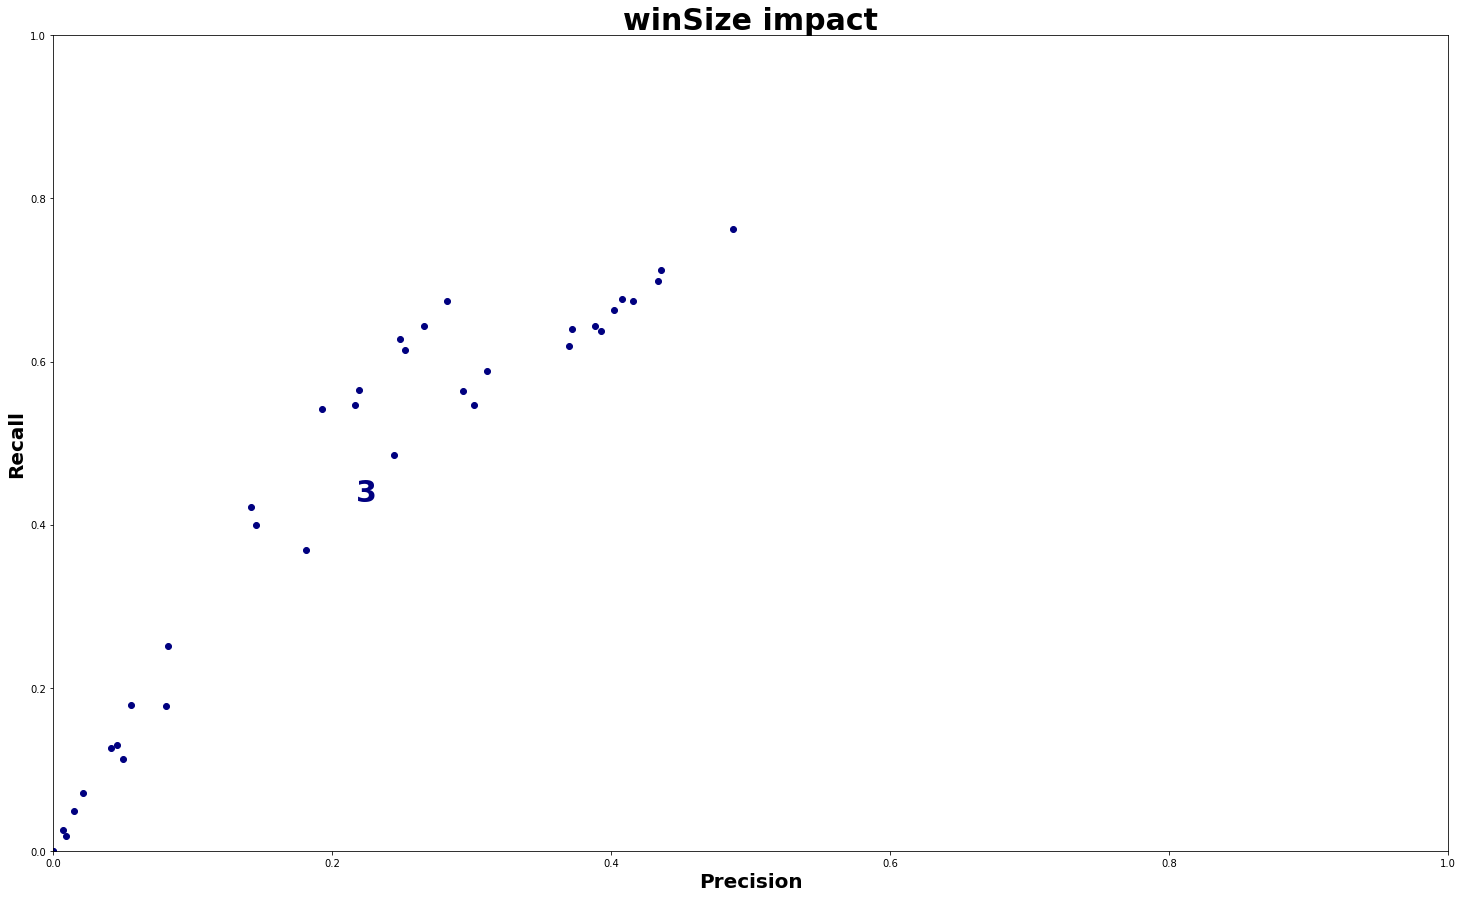

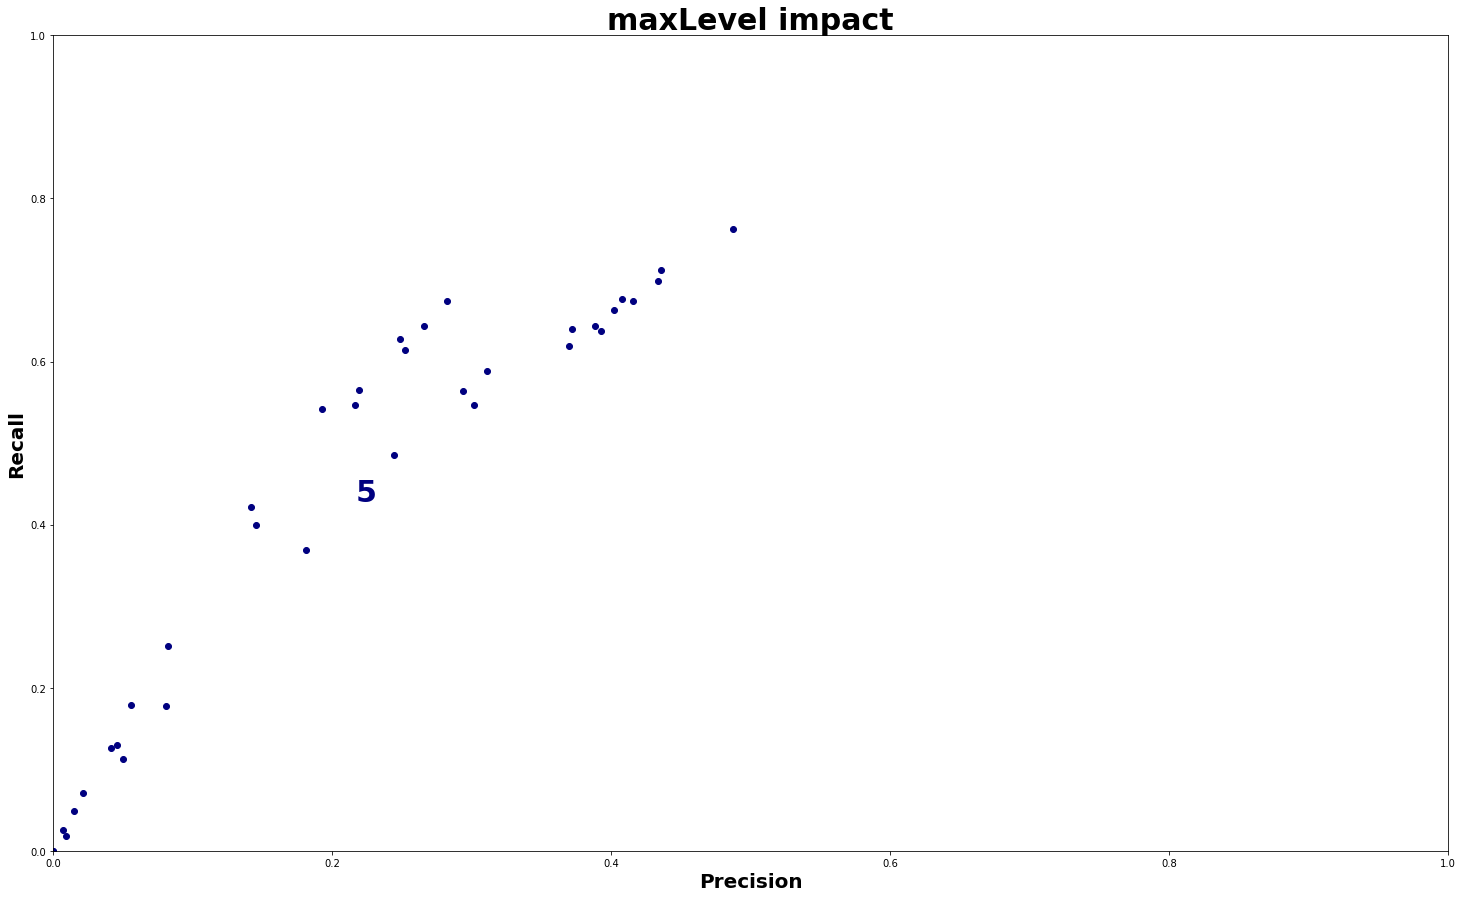

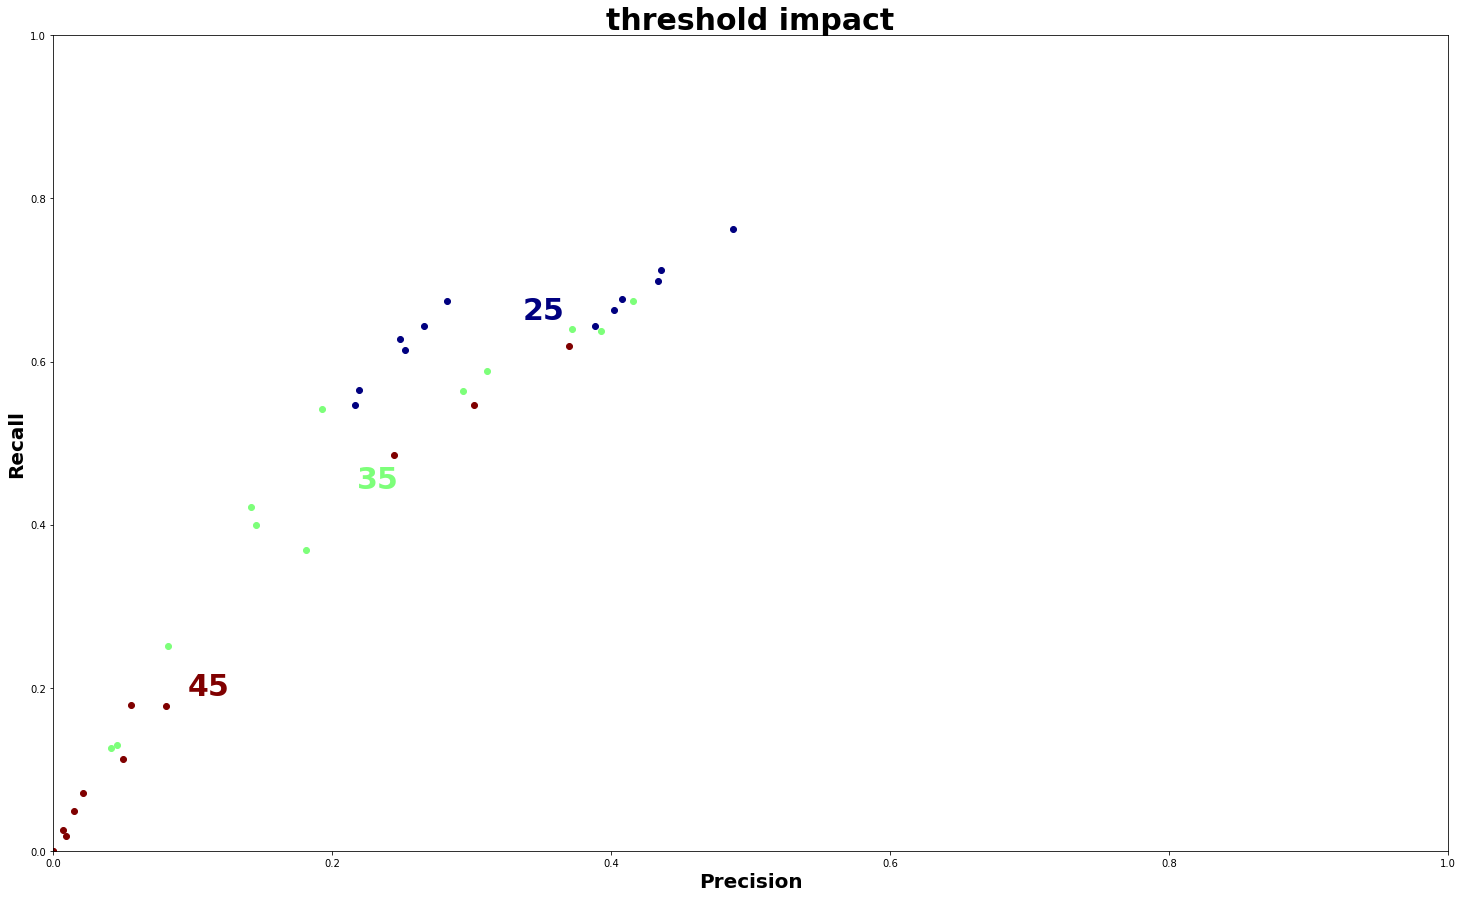

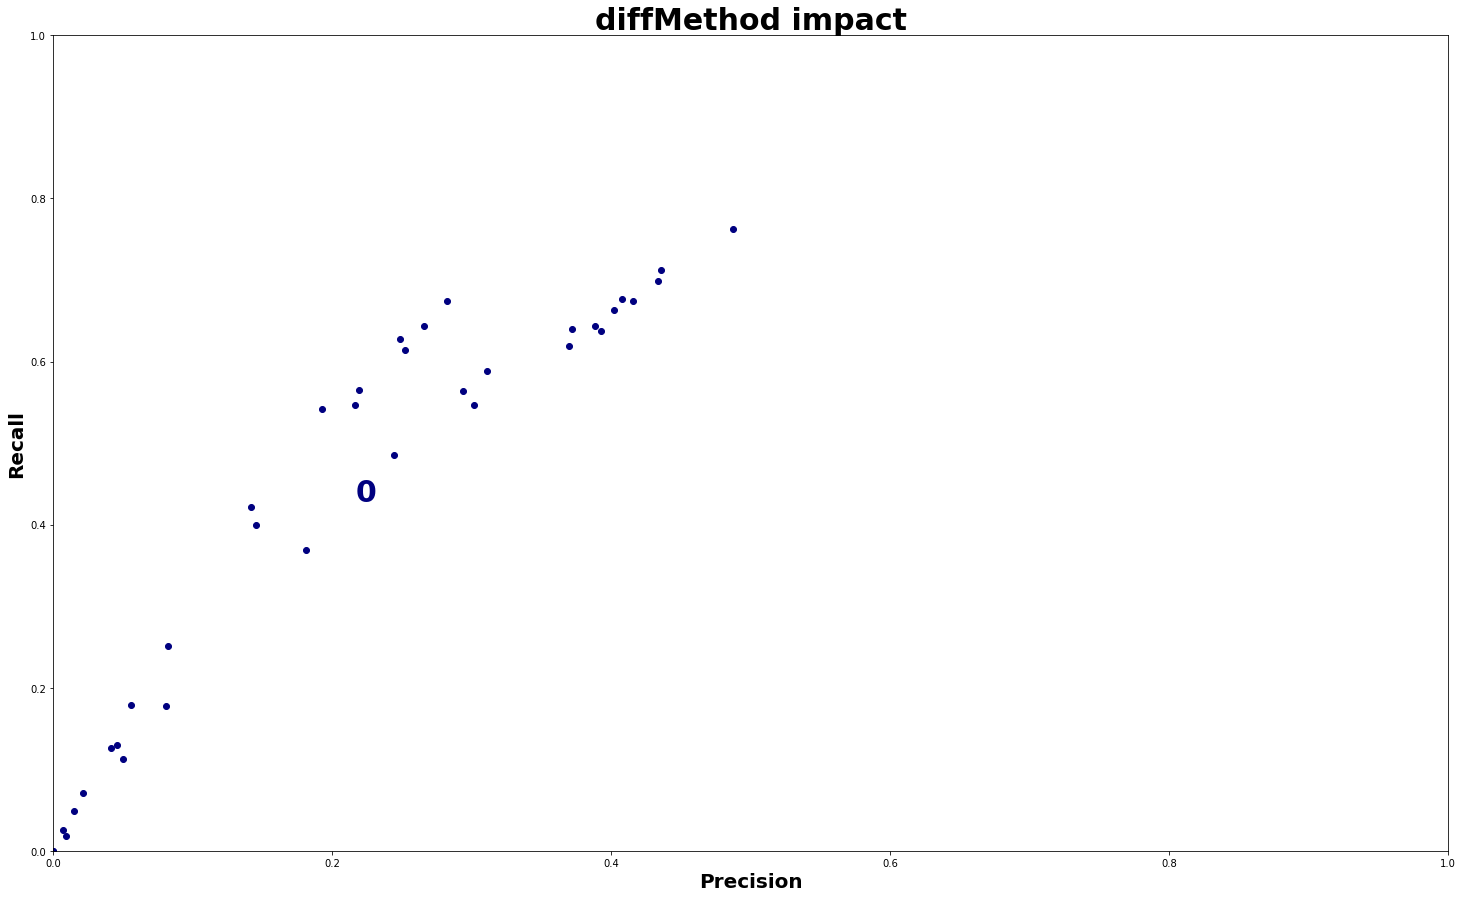

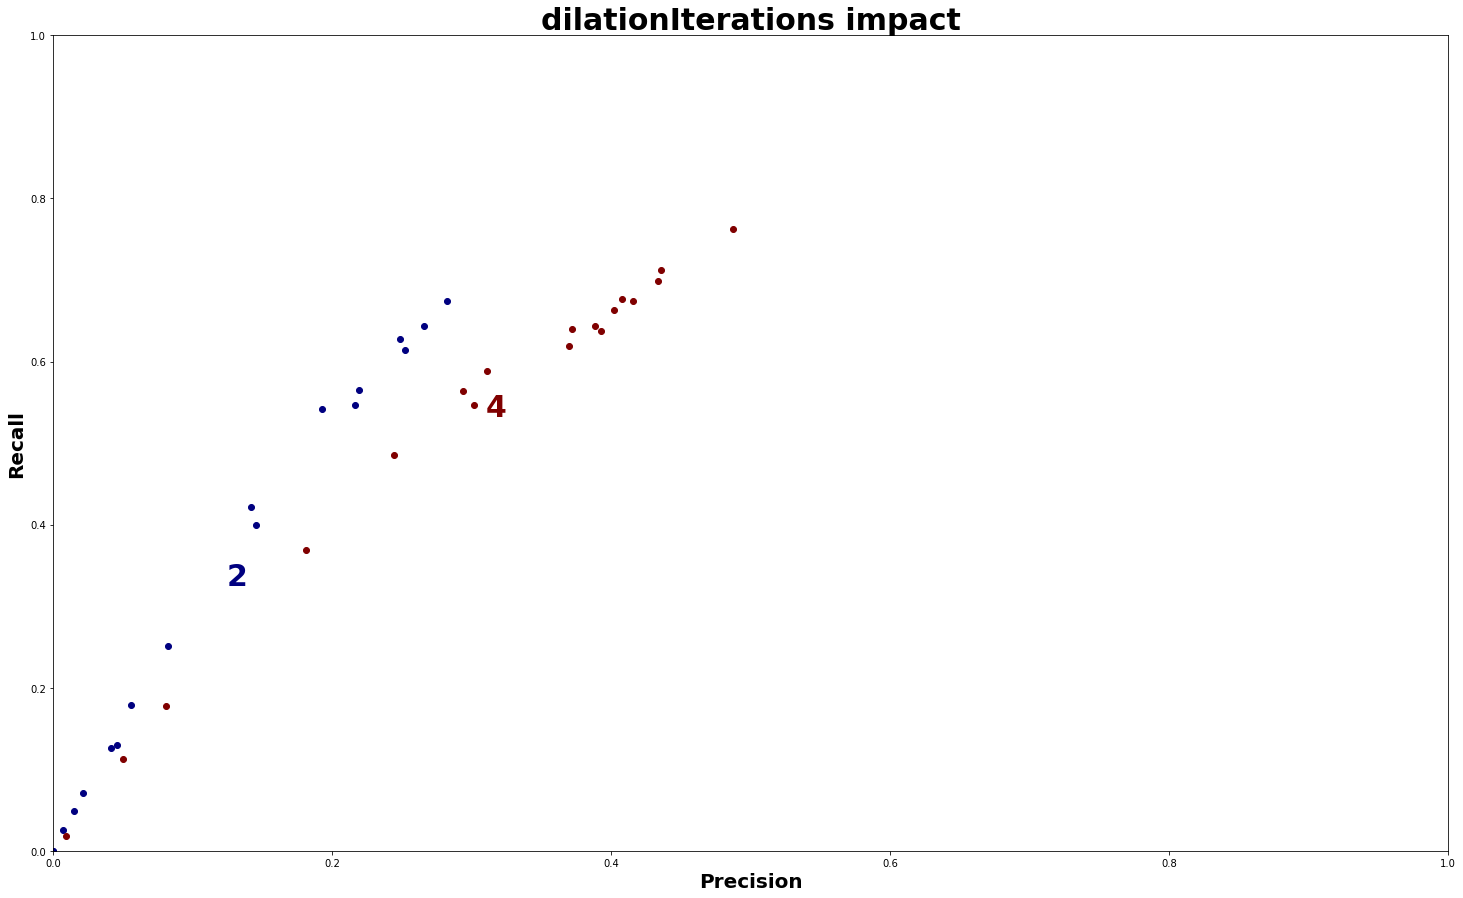

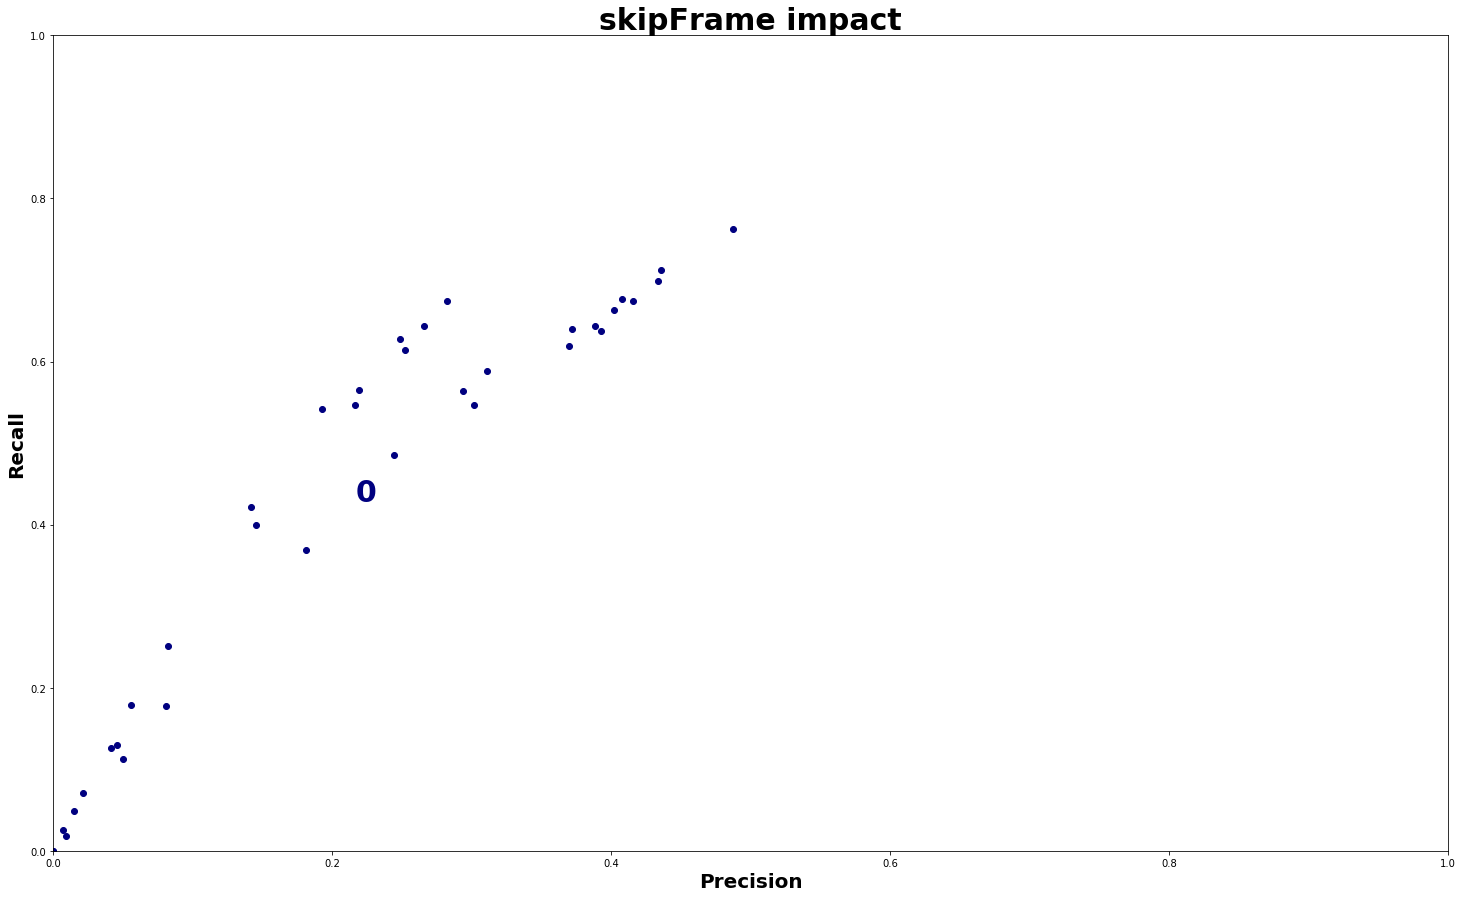

In [21]:
params = {
'gaussWindow': range(3, 6, 2),
'mgp': range(25, 26, 25),
'residualConnections': range(1, 4),
'winSize': range(3, 4, 2),
'maxLevel': range(5, 6, 3),
'threshold': range(25, 46, 10),
'diffMethod': range(0, 1, 1),
'dilationIterations': range(2, 5, 2),
'skipFrame': range(0, 1, 1)
}

for items in params.items():
    plotParam(items[0], items[1])

In [22]:
# Max f1_score
df[df["f1_score"] == max(df["f1_score"])]

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold,diffMethod,dilationIterations,skipFrame,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
18,3,25,1,3,5,25,0,4,0,93.036412,1.625348,1.56546,0.763231,0.487544,0.76217,0.297341


In [23]:
# Max precision
df[df["percentHeliTotalFiltered"] == max(df["percentHeliTotalFiltered"])]

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold,diffMethod,dilationIterations,skipFrame,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
18,3,25,1,3,5,25,0,4,0,93.036412,1.625348,1.56546,0.763231,0.487544,0.76217,0.297341


In [24]:
# Max recall
df[df["percentFrameWithHeli"] == max(df["percentFrameWithHeli"])]

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold,diffMethod,dilationIterations,skipFrame,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
18,3,25,1,3,5,25,0,4,0,93.036412,1.625348,1.56546,0.763231,0.487544,0.76217,0.297341


Text(0, 0.5, 'Score [-]')

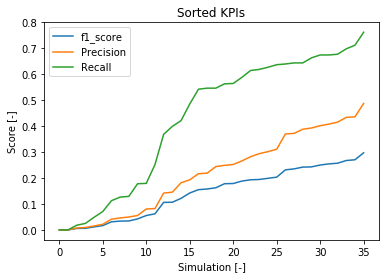

In [25]:
plt.figure()
plt.plot(sorted(df["f1_score"]))
plt.plot(sorted(df["percentHeliTotalFiltered"]))
plt.plot(sorted(df["percentFrameWithHeli"]))
plt.legend(['f1_score', 'Precision', 'Recall'])
plt.title("Sorted KPIs")
plt.xlabel("Simulation [-]")
plt.ylabel("Score [-]")